# ASTHETIC

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

### Read the image, get dimensions

Shape: (256, 256, 3)


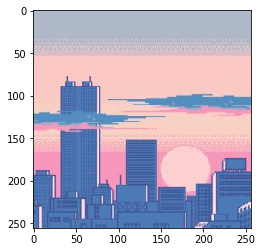

In [2]:
image = cv2.imread('sample.png')
print("Shape: {}".format(image.shape))

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

width = image.shape[1]
height = image.shape[0]

plt.imshow(image)

Finding the most common colors using k-means clustering
source: https://github.com/kb22/Color-Identification-using-Machine-Learning

In [3]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

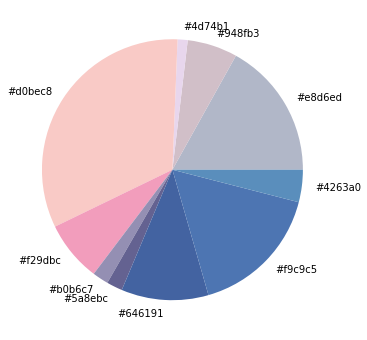

In [4]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
        
    return rgb_colors   

pallate = get_colors(get_image('sample.png'), 10, True)

## Now, use those colors to fill an image

In [5]:
import os
from PIL import Image
import math  

def square_difference(a, b):
    s = 0
    ret = 0
    i = 0

    while i < len(a):
        s += (b[i] - a[i])**2
        i+=1

    ret = math.sqrt(s)
    return ret

# returns the closest color
def find_nearest(pixel, pallate): 
    differences = []
    
    for p in pallate:
        differences.append(square_difference(p, pixel))

    min_pos = differences.index(min(differences)) 
    return pallate[min_pos]

for w in range(width):
    for h in range(height):
        pixel = image[h, w]
        color = find_nearest(pixel, pallate)
        image[h, w] = color



### Display Result

True

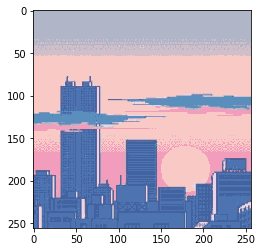

In [6]:
plt.imshow(image)
cv2.imwrite('result.png', image)